<h2>Titter sentiment analysis</h2>

- You can also multiply score by the number of likes a particular tweet has received
- Display the word cloud for each candidate
- Display the data on a time series graph
- Include an image of the polls graph

https://projects.fivethirtyeight.com/polls/pennsylvania/

In [35]:
import os
import nltk
import tweepy
from dotenv import load_dotenv
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime

In [6]:
import ssl
def set_up_ssl():
    try:
        _create_unverified_https_context = ssl._create_unverified_context
    except AttributeError:
        pass
    else:
        ssl._create_default_https_context = _create_unverified_https_context

In [7]:
set_up_ssl()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dennisfenchenko/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
load_dotenv()
TWITTER_BEARER_TOKEN = os.getenv('TWITTER_BEARER_TOKEN')
TWITTER_API_KEY = os.getenv('TWITTER_API_KEY')
TWITTER_API_SECRET_KEY = os.getenv('TWITTER_API_SECRET_KEY')
TWITTER_ACCESS_TOKEN = os.getenv('TWITTER_ACCESS_TOKEN')
TWITTER_ACCESS_TOKEN_SECRET = os.getenv('TWITTER_ACCESS_TOKEN_SECRET')

In [89]:
print("Authenticating to Twitter...")

# client = tweepy.Client(bearer_token=TWITTER_BEARER_TOKEN)
client = tweepy.Client(bearer_token=TWITTER_BEARER_TOKEN)
auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET_KEY)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)

Authenticating to Twitter...


In [90]:
# create Twitter API client
api = tweepy.API(auth, wait_on_rate_limit=True)

In [87]:
# TEST CODE

tweets

[Status(_api=<tweepy.api.API object at 0x1089248b0>, _json={'created_at': 'Wed Oct 05 17:39:10 +0000 2022', 'id': 1577715031621439494, 'id_str': '1577715031621439494', 'full_text': "John Fetterman doesn't live in New Jersey, won't vote in Turkey's elections, and never killed puppies.\n\nHis opponent can't say that.", 'truncated': False, 'display_text_range': [0, 132], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1640929196, 'id_str': '1640929196', 'name': 'BrooklynDad_Defiant!☮️', 'screen_name': 'mmpadellan', 'location': 'Brooklyn, NY', 'description': "Proud papa. Perpetually pissed.\n#BlueWave2022, #Feminist. \n#IStandWithUkraine🇺

In [82]:
# TEST CODE

tweet_status = tweets[1]
print(tweet_status)
# print("tweets ", len(tweets))

Status(_api=<tweepy.api.API object at 0x1089248b0>, _json={'created_at': 'Sun Oct 09 19:44:21 +0000 2022', 'id': 1579196087578943488, 'id_str': '1579196087578943488', 'full_text': '‘Dr Oz has never stopped reminding me that I had a stroke,’ @JohnFetterman says at top of a rally in Bucks County.  ‘I guarantee there’s at least one person here filing me hoping to catch me missing some words. What kind of a doctor roots for somebody who was sick, stay sick?’', 'truncated': False, 'display_text_range': [0, 277], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'JohnFetterman', 'name': 'John Fetterman', 'id': 3622368202, 'id_str': '3622368202', 'indices': [60, 74]}], 'urls': []}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': Non

In [51]:
# TEST CODE

json_tweet_str = json.dumps(tweet_status._json)

json_tweet = json.loads(json_tweet_str)

In [52]:
# TEST CODE
json_tweet

{'created_at': 'Sun Oct 09 19:44:21 +0000 2022',
 'id': 1579196087578943488,
 'id_str': '1579196087578943488',
 'full_text': '‘Dr Oz has never stopped reminding me that I had a stroke,’ @JohnFetterman says at top of a rally in Bucks County.  ‘I guarantee there’s at least one person here filing me hoping to catch me missing some words. What kind of a doctor roots for somebody who was sick, stay sick?’',
 'truncated': False,
 'display_text_range': [0, 277],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'JohnFetterman',
    'name': 'John Fetterman',
    'id': 3622368202,
    'id_str': '3622368202',
    'indices': [60, 74]}],
  'urls': []},
 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_

In [53]:
# TEST CODE
json_tweet["full_text"]

'‘Dr Oz has never stopped reminding me that I had a stroke,’ @JohnFetterman says at top of a rally in Bucks County.  ‘I guarantee there’s at least one person here filing me hoping to catch me missing some words. What kind of a doctor roots for somebody who was sick, stay sick?’'

In [11]:
# TEST CODE

print("Creating Vader sentiment analyzer object")

sentiment = SentimentIntensityAnalyzer()

Creating Vader sentiment analyzer object


In [68]:
# TEST CODE
ls = ["what", "terrible", "idea"]
sentiment.polarity_scores("What a terrible idea!")

{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5255}

In [70]:
# TEST CODE
sentiment.polarity_scores(ls)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [92]:
def get_tweets_for_user(username, end_date, num_tweets):
    search_query = username + " -filter:retweets"
    tweets = api.search_tweets(q = search_query, count = num_tweets,
                               tweet_mode="extended",
                           lang="en", result_type="popular", until = end_date)
    return tweets

In [100]:
print("Fetching tweets for two candidates")

UNTIL_DATE = "2022-10-13"
NUM_TWEETS = 100

democratic_candidate_query = '@JohnFetterman OR "John Fetterman" OR "Fetterman"'

republic_candidate_query = '@DrOz OR "Dr. Oz" OR "Dr Oz" OR "Dr. Mehmet Oz" OR "Mehmet Oz"'

democratic_tweets = get_tweets_for_user(democratic_candidate_query,
                                        UNTIL_DATE, NUM_TWEETS)

republican_tweets = get_tweets_for_user(republic_candidate_query,
                                        UNTIL_DATE, NUM_TWEETS)

Fetching tweets for two candidates


In [101]:
print("The numeber of tweets fetch for each candidate is: ")
print("Democratic candidate ", len(democratic_tweets))
print("Republican candidate ", len(republican_tweets))

The numeber of tweets fetch for each candidate is: 
Democratic candidate  15
Republican candidate  11


In [96]:
def convert_tweets_to_json(raw_tweets):
    json_tweets = []
    for tweet in raw_tweets:
        json_tweet_str = json.dumps(tweet._json)
        json_tweet = json.loads(json_tweet_str)
        json_tweets.append(json_tweet)
    return json_tweets

In [97]:
print("Converting democratic tweets to json")
democratic_json_tweets = convert_tweets_to_json(democratic_tweets)

print("Converting republican tweets to json")
republican_json_tweets = convert_tweets_to_json(republican_tweets)

Converting democratic tweets to json
Converting republican tweets to json


In [28]:
def write_json_tweets_to_file(json_tweets, TWEETS_DIR, FILE_NAME):
    tweets_file = open(TWEETS_DIR + FILE_NAME, "a")
    tweets_file_str = json.dumps(json_tweets)
    tweets_file.write(tweets_file_str)
    tweets_file.close()

In [29]:
print("Writing tweets to a file")

TWEETS_DIR = "tweets/"

DEMOCRATIC_TWEETS_FILE_NAME = "democratic_tweets.json"
REPUBLICAN_TWEETS_FILE_NAME = "republican_tweets.json"

write_json_tweets_to_file(democratic_json_tweets, TWEETS_DIR, DEMOCRATIC_TWEETS_FILE_NAME)

write_json_tweets_to_file(republican_json_tweets, TWEETS_DIR, REPUBLICAN_TWEETS_FILE_NAME)

Writing tweets to a file


In [30]:
def read_tweets_from_file(file_name):
    with open(TWEETS_DIR + file_name, "r") as tweets_file:
        tweets = json.load(tweets_file)
    return tweets

In [31]:
print("Retrieving the tweets for both candidates from file")

READ_TWEETS_FROM_FILE = False

if READ_TWEETS_FROM_FILE:
    democratic_json_tweets = read_tweets_from_file(DEMOCRATIC_TWEETS_FILE_NAME)
    republican_json_tweets = read_tweets_from_file(REPUBLICAN_TWEETS_FILE_NAME)

Retrieving the tweets for both candidates from file


In [72]:
print("Creating Vader sentiment analyzer object")

sentiment = SentimentIntensityAnalyzer()

Creating Vader sentiment analyzer object


In [73]:
democratic_json_tweets[0]

{'created_at': 'Wed Oct 12 13:47:20 +0000 2022',
 'id': 1580193404708786178,
 'id_str': '1580193404708786178',
 'full_text': "I have a confession to make.\n\nI used a teleprompter in this interview last night. The truth is I am not able to do my show without a teleprompter. (That's true of every TV news host who is discussing the way John Fetterman does interviews.) https://t.co/EAK1TLcwBm",
 'truncated': False,
 'display_text_range': [0, 240],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/EAK1TLcwBm',
    'expanded_url': 'https://twitter.com/TheLastWord/status/1580158903450742786',
    'display_url': 'twitter.com/TheLastWord/st…',
    'indices': [241, 264]}]},
 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id

In [141]:
# this function retruns a dictionary containing
# TODO: don't put retweets into result, perhaps just weight it into the calculation
def get_tweet_sentiment_score(tweets):
    sentiments = []
    for tweet in tweets:
        timestamp = tweet["created_at"]
        datetime_timestamp = datetime.strftime(datetime.strptime(timestamp,'%a %b %d '
                                                                   '%H:%M:%S +0000 %Y'), '%Y-%m-%d')
        tweet_body = tweet["full_text"]
        retweet_count = tweet["retweet_count"]
        tweet_sentiment = sentiment.polarity_scores(tweet_body)
        tweet_neg_score = tweet_sentiment['neg'] * retweet_count
        tweet_neu_score = tweet_sentiment['neu'] * retweet_count
        sentiments.append((datetime_timestamp, tweet_neu_score,
                           tweet_neg_score))
    return sentiments

In [142]:
print("Getting sentiment scores for each candidate")

democratic_sentiments = get_tweet_sentiment_score(democratic_json_tweets)

republican_sentiments = get_tweet_sentiment_score(republican_json_tweets)

Getting sentiment scores for each candidate


In [143]:
print("Analysis for democratic candidate yields:")
print(democratic_sentiments)

Analysis for democratic candidate yields:
[('2022-10-12', 6479.872, 0.0), ('2022-10-12', 3204.3700000000003, 877.63), ('2022-10-12', 2485.3740000000003, 0.0), ('2022-10-12', 3271.194, 231.966), ('2022-10-12', 7485.0, 0.0), ('2022-10-12', 3742.0, 0.0), ('2022-10-12', 2431.0, 0.0), ('2022-10-12', 1902.912, 53.856), ('2022-10-12', 1548.406, 218.776), ('2022-10-12', 1452.285, 105.024), ('2022-10-12', 1187.7900000000002, 0.0), ('2022-10-12', 2170.2509999999997, 466.74899999999997), ('2022-10-12', 990.6, 643.89), ('2022-10-12', 541.36, 221.39200000000002), ('2022-10-12', 732.26, 46.739999999999995)]


In [144]:
print("Analysis for republican candidate yields:")
print(republican_sentiments)

Analysis for republican candidate yields:
[('2022-10-12', 12618.892000000002, 2856.051), ('2022-10-12', 4911.12, 637.584), ('2022-10-12', 1187.7900000000002, 0.0), ('2022-10-12', 1500.324, 498.624), ('2022-10-12', 2195.8160000000003, 0.0), ('2022-10-12', 302.0, 0.0), ('2022-10-12', 186.875, 59.800000000000004), ('2022-10-12', 468.0, 0.0), ('2022-10-12', 265.608, 75.327), ('2022-10-12', 245.616, 0.0), ('2022-10-12', 188.38400000000001, 12.992)]


In [145]:
def get_date_score_mapping(candidate_sentiments):
    candidate_total_sentiment = {}
    DATE_IDX = 0
    NEUTRAL_SCORE_IDX = 1
    NEGATIVE_SCORE_IDX = 2

    for sent in candidate_sentiments:
        date = sent[DATE_IDX]
        if date in candidate_total_sentiment.keys():
            curr_neutral_score = \
                candidate_total_sentiment[date][0]
            curr_negative_score = candidate_total_sentiment[date][1]
            curr_neutral_score += sent[NEUTRAL_SCORE_IDX]
            curr_negative_score += sent[NEGATIVE_SCORE_IDX]
            candidate_total_sentiment[date] = (curr_neutral_score, curr_negative_score)
        else:
            candidate_total_sentiment[date] = (sent[NEUTRAL_SCORE_IDX], sent[NEGATIVE_SCORE_IDX])
        return candidate_total_sentiment

In [146]:
print("Creating date-sentiment map for each candidate: ")

democratic_total_sentiment = get_date_score_mapping(democratic_sentiments)

republican_total_sentiment = get_date_score_mapping(republican_sentiments)

Creating date-sentiment map for each candidate: 


In [147]:
print("The sentiment map for democratic candidate is: ")

print(democratic_total_sentiment)

The sentiment map for democratic candidate is: 
{'2022-10-12': (6479.872, 0.0)}


In [148]:
print("The sentiment map for republican candidate is: ")

print(republican_total_sentiment)

The sentiment map for republican candidate is: 
{'2022-10-12': (12618.892000000002, 2856.051)}


In [149]:
democratic_dates = list(democratic_total_sentiment.keys())
democratic_sent = list(democratic_total_sentiment.values())

democratic_neu_sent = [x[0] for x in democratic_sent]
democratic_neg_sent = [x[1] for x in democratic_sent]


republican_dates = list(republican_total_sentiment.keys())
republican_sent = list(republican_total_sentiment.values())

republican_neu_sent = [x[0] for x in republican_sent]
republican_neg_sent = [x[1] for x in republican_sent]

Plotting the data for the democratic candidate: 


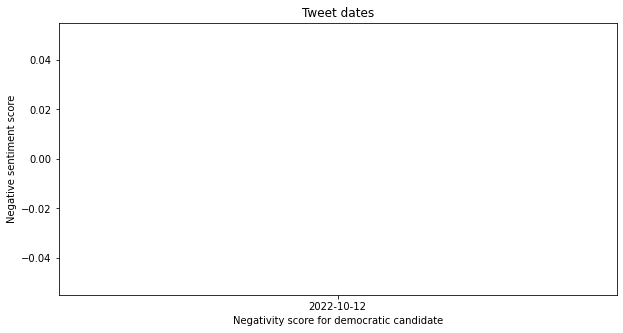

In [150]:
print("Plotting the data for the democratic candidate: ")

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(democratic_dates, democratic_neg_sent, color ='red',
        width = 0.4)

plt.xlabel("Negativity score for democratic candidate")
plt.ylabel("Negative sentiment score")
plt.title("Tweet dates")
plt.show()

Plotting the data for the republican candidate: 


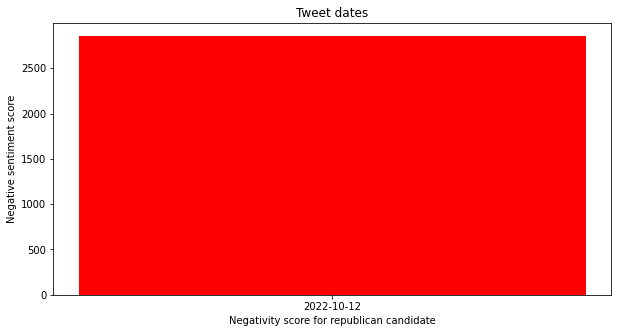

In [151]:
print("Plotting the data for the republican candidate: ")

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(republican_dates, republican_neg_sent, color ='red',
        width = 0.4)

plt.xlabel("Negativity score for republican candidate")
plt.ylabel("Negative sentiment score")
plt.title("Tweet dates")
plt.show()